In [10]:
# Check for null, NaN, or blank values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for empty strings (blanks)
blanks = (data == '').sum()
print("\nBlank values in each column:")
print(blanks)

Missing values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
Cluster        0
dtype: int64

Blank values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
Cluster        0
dtype: int64


In [11]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Maternal Health Risk Data Set.csv')

# Basic statistics summary
print(data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


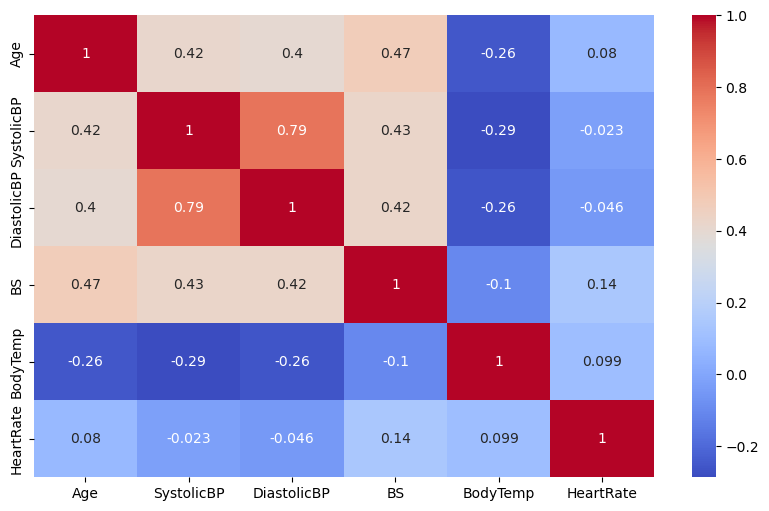

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


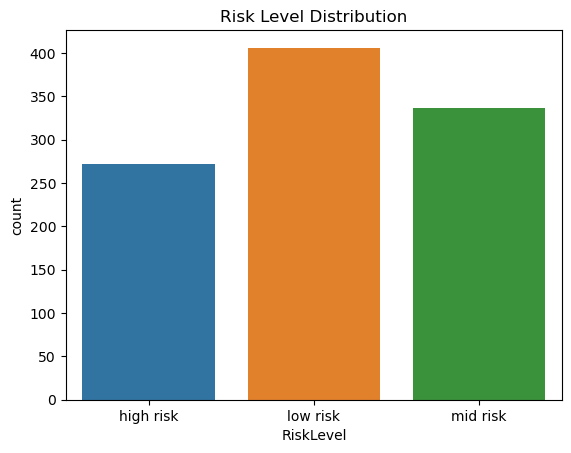

In [13]:
# Plotting the distribution of RiskLevel
sns.countplot(x='RiskLevel', data=data)
plt.title('Risk Level Distribution')
plt.show()


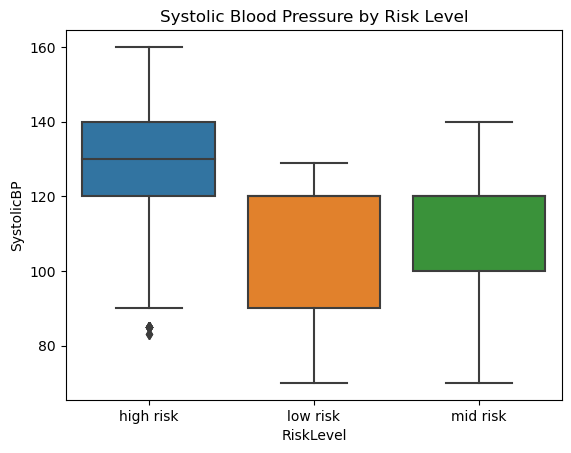

In [14]:
# Box plot for SystolicBP based on RiskLevel
sns.boxplot(x='RiskLevel', y='SystolicBP', data=data)
plt.title('Systolic Blood Pressure by Risk Level')
plt.show()


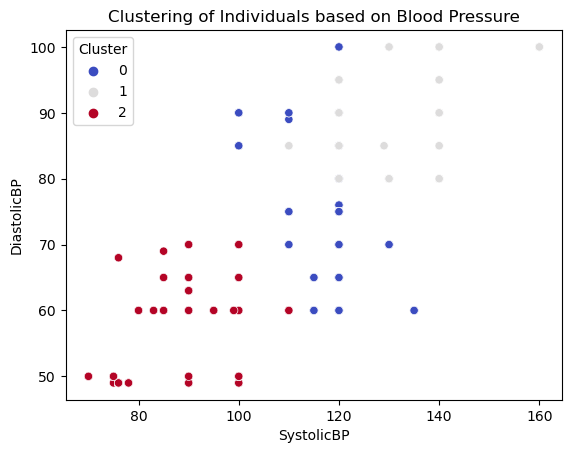

In [15]:
from sklearn.cluster import KMeans

# Selecting features for clustering
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]

# Apply KMeans with explicit n_init value to avoid the warning
kmeans = KMeans(n_clusters=3, n_init=10)  # Set n_init explicitly

# Fit the model and add the cluster labels to the DataFrame
data['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='SystolicBP', y='DiastolicBP', hue='Cluster', data=data, palette='coolwarm')
plt.title('Clustering of Individuals based on Blood Pressure')
plt.show()